(-2.0, 2.0)

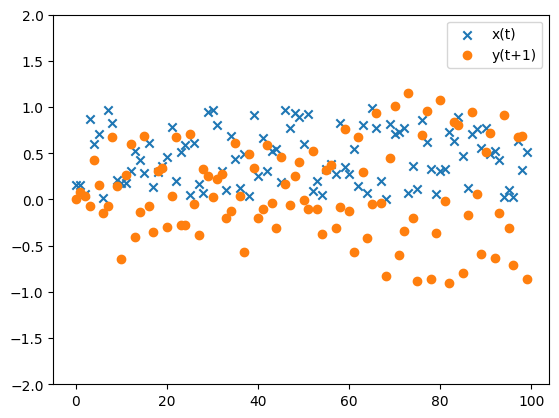

In [21]:
# generate the data
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100) # generate the 100 numbers btw 0 and 1
y = np.zeros(100)

y[0]=0
y[1] = -0.5*y[0] -0 + 0.5*x[0]
for t in range(2,100):
    y[t] = -0.5*y[t-1] -y[t-2] + 0.5*x[t-1]
plt.scatter(range(100), x, marker='x', label='x(t)')
plt.scatter(range(100), y,marker='o', label='y(t+1)')
plt.legend()
plt.ylim(-2,2)

In [49]:
# build this recurrent network
class Recurrent:
  def __init__(self, n_iter=500,lr=0.01):
    self.n_iter = n_iter
    self.weights = None
    self.lr = lr
    self.trainingerror= []
    self.w0=[]
    self.w1=[]
    self.w2=[]

  def fit(self, X,y):
    np.random.seed(41)
    #initialize the weights for y(t-1) , y(t-2) and x(t-1)
    self.weights = np.random.randn(3) *0.1 # scaled down initialization: (to avoid gradient vanishing or explosion)
    for epoch in range(self.n_iter):
      y_hat= self.forward(X)
      loss = np.mean((y_hat - y)**2)
      self.trainingerror.append(loss)
      self.bptt(X,y,y_hat)
      self.w0.append(self.weights[0])
      self.w1.append(self.weights[1])
      self.w2.append(self.weights[2])

      if epoch % 100 ==0:
        print(f' Epoch {epoch}, Loss: {loss}')
    print(f'the weights are w1 : {self.weights[0]}, w2 : {self.weights[1]}, w3 : {self.weights[2]}')

  def forward(self,X):
    y_pred= np.zeros_like(X)
    # y[0]
    y_pred[0]=0
    y_pred[1]= self.weights[0] * y_pred[0] - 0 + self.weights[2] * X[0] # y[-1] =0
    for t in range(2,len(X)):
      y_pred[t] = (self.weights[0] *y[t-1] +
              self.weights[1] *y[t-2] +
              self.weights[2]*X[t-1])
    return y_pred



  def bptt(self, X, y,y_hat): # back propogation through time - BPTT
    dLdW1, dLdW2, dLdW3 = 0,0,0
    dy = (y_hat - y) / len(X)
    for t in reversed(range(2,len(X))): # gradients are accumulated over a sequence of data then update the weightes
      dLdW1 += dy[t]*y[t-1]
      dLdW2 += dy[t] * y[t-2]
      dLdW3 += dy[t] * X[t-1]
    self.weights[0]-= self.lr*dLdW1
    self.weights[1]-= self.lr*dLdW2
    self.weights[2]-= self.lr*dLdW3

rn = Recurrent()
rn.fit(x,y)


 Epoch 0, Loss: 0.25786645743536823
 Epoch 100, Loss: 0.17870851312935013
 Epoch 200, Loss: 0.1250311870391721
 Epoch 300, Loss: 0.08816331574004234
 Epoch 400, Loss: 0.062562260772851
the weights are w1 : -0.23667968914654028, w2 : -0.6174368674452982, w3 : 0.26359014158806116


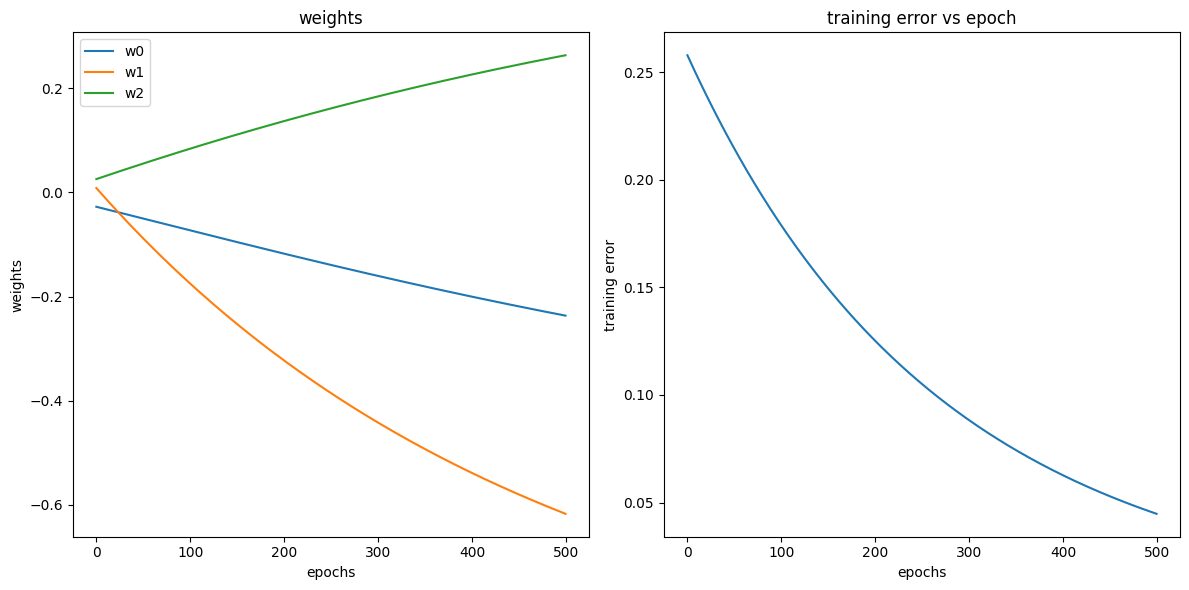

In [50]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("weights")
plt.ylabel('weights')
plt.xlabel('epochs')
plt.plot( rn.w0 , label='w0')
plt.plot(rn.w1, label='w1')
plt.plot(rn.w2, label='w2')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(rn.n_iter), rn.trainingerror)
plt.title('training error vs epoch')
plt.xlabel('epochs')
plt.ylabel('training error')
plt.tight_layout()